In [1]:
import pandas as pd
import numpy as np

In [6]:
salary=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Salary%20Data.csv')

In [7]:
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [9]:
salary.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [11]:
salary.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [12]:
X=salary[['Experience Years']]
y=salary['Salary']

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=0)


In [59]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30, 1), (10, 1), (30,), (10,))

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
model.intercept_

26560.874002294848

In [24]:
model.coef_

array([9471.76627065])

In [29]:
y_pred=model.predict(X_test)
y_pred

array([74866.88198261, 71078.17547435, 82444.29499913, 45504.4065436 ,
       56870.52606838, 64447.9390849 , 88127.35476152, 59712.05594957,
       67289.46896609, 90968.88464272])

In [27]:
X_test

,Experience Years
22,5.1
20,4.7
25,5.9
4,2.0
10,3.2
15,4.0
28,6.5
11,3.5
18,4.3
29,6.8


In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

7.398981424634029

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean squared Error: ",mean_squared_error(y_test,y_pred))

Mean absolute Error:  4582.934562849305
Mean squared Error:  33006168.871031553


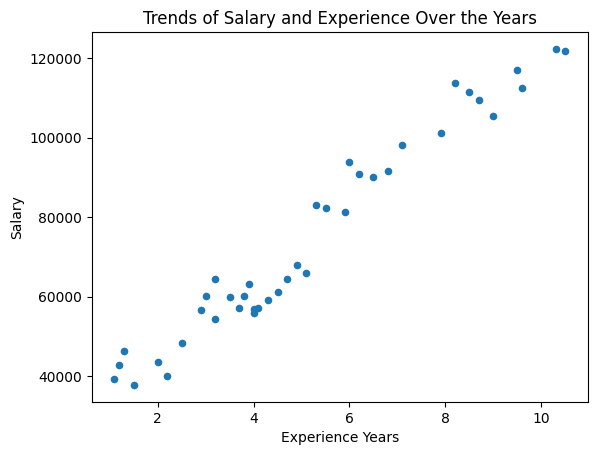

In [58]:
import matplotlib.pyplot as plt
salary.plot(x='Experience Years',y='Salary',kind='scatter',style='o')
plt.title("Trends of Salary and Experience Over the Years")
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

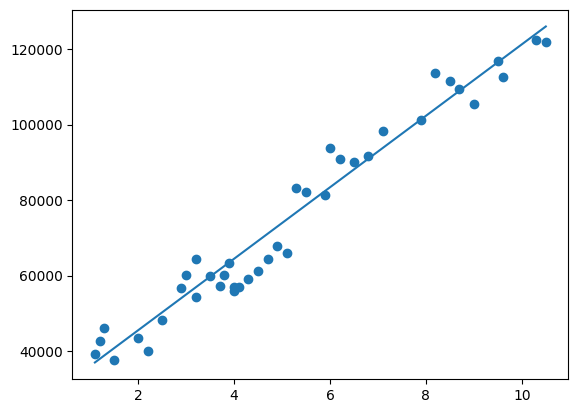

In [50]:
line=model.coef_*X+model.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [52]:
print("Training Score: ",model.score(X_train,y_train))
print("Testing Score: ",model.score(X_test,y_test))

Training Score:  0.9639730856801569
Testing Score:  0.8461188923553821


In [54]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
22,66029,74866.881983
20,64500,71078.175474
25,81363,82444.294999
4,43525,45504.406544
10,64445,56870.526068
15,55794,64447.939085
28,90000,88127.354762
11,60000,59712.055950
18,59095,67289.468966
29,91738,90968.884643
